# FMCG
Company need to decide which countries fall in the same range of export and which don’t. Objective is to cluster the countries based on various sales data provided to us across years

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
# reading data from csv file

data = pd.read_csv('Project_Data_1.csv')
data['Country'] = data['Sales of Wheat in tons']
data.drop(['Sales of Wheat in tons'],axis=1,inplace=True)

In [3]:
# converting all the string values to float

def concommaint(x):
    if type(x) == str:
        t = ''
        for i in x :
            if i != ',' :
                t += i
        return int(t)
    else:
        return int(x)

cols = data.columns

for i in cols[:-1]:
    data[i] = data[i].apply(concommaint)

In [4]:
# normalising the data

normdata = data.drop(['Country'],axis=1)
for i in cols[:-1] :
    normdata[i] = data[i].subtract(data.mean(axis=1)).divide(data.std(axis=1))

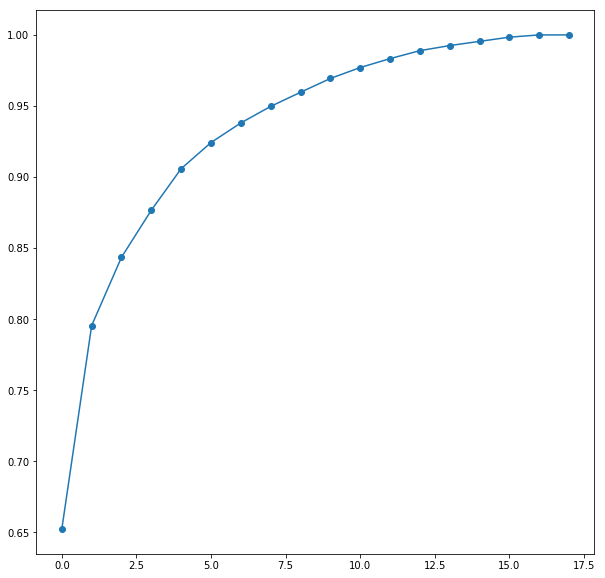

In [5]:
# applying PCA to find optimal number of components

pca = PCA()
pca.fit(normdata)

plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o')

In [6]:
# transforming data into selected number of components

pca_f = PCA(n_components=2)
pca_f.fit(normdata)
scores_pca = pca_f.transform(normdata)

In [7]:
pca_data = pd.DataFrame(scores_pca,columns=['axis1','axis2'])
data_u = pd.concat([pca_data,data],axis=1)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

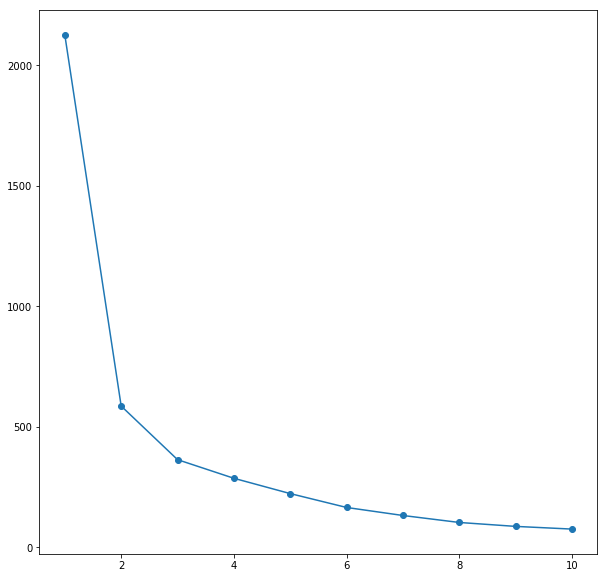

In [8]:
# finding the optimal number of clusters

wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss,marker='o')

In [9]:
# applying the K-menas clustering

kmeans = KMeans(n_clusters=2,init = 'k-means++',random_state=42)
kmeans.fit(scores_pca)

km_lab = kmeans.fit_predict(scores_pca)

km_lab_df = pd.DataFrame(km_lab,columns = ['Label'])
km_clus_data = pd.concat([data_u,km_lab_df],axis=1)

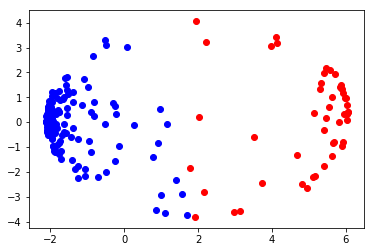

In [10]:
plt.scatter(km_clus_data.loc[km_clus_data['Label']==0]['axis1'],km_clus_data.loc[km_clus_data['Label']==0]['axis2'], c = 'red', label = 'Cluster 1')
plt.scatter(km_clus_data.loc[km_clus_data['Label']==1]['axis1'],km_clus_data.loc[km_clus_data['Label']==1]['axis2'], c = 'blue', label = 'Cluster 2')
plt.show()

In [11]:
# applying the Hirarchial clustering

clustering = AgglomerativeClustering().fit(scores_pca)
hc_lab = clustering.fit_predict(scores_pca)

hc_lab_df = pd.DataFrame(hc_lab,columns = ['Label'])
hc_clus_data = pd.concat([data_u,hc_lab_df],axis=1)

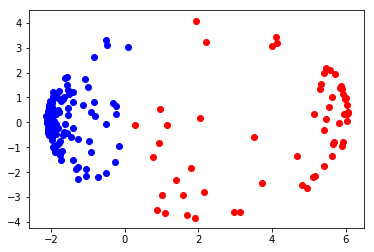

In [12]:
plt.scatter(hc_clus_data.loc[hc_clus_data['Label']==0]['axis1'],hc_clus_data.loc[hc_clus_data['Label']==0]['axis2'], c = 'red', label = 'Cluster 1')
plt.scatter(hc_clus_data.loc[hc_clus_data['Label']==1]['axis1'],hc_clus_data.loc[hc_clus_data['Label']==1]['axis2'], c = 'blue', label = 'Cluster 2')
plt.show()